### Outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
d= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [114]:
import pandas as pd
df=pd.DataFrame()
df['valor']=d

In [115]:
df.head(5)

,valor
0,11
1,10
2,12
3,14
4,12


### Detecting outlier using Z score

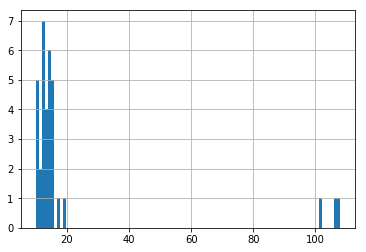

In [116]:
df['valor'].hist(bins=100)

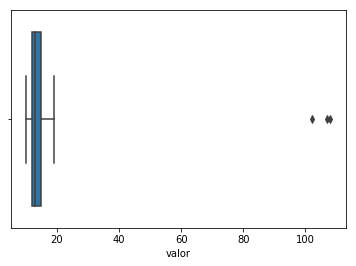

In [117]:
%matplotlib  inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['valor'])
#df.boxplot(column='valor')

In [73]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [118]:
df.describe()

,valor
count,34.000000
mean,21.176471
std,26.768899
min,10.000000
25%,12.000000
50%,13.000000
75%,15.000000
max,108.000000


In [119]:
media=df['valor'].mean()
std=df['valor'].std()
print(media, std)


21.176470588235293 26.76889939920136


In [120]:
from scipy import stats
import numpy as np
df['tipificado'] = np.abs (stats.zscore (df.valor)) 

In [121]:
df

,valor,tipificado
0,11,0.385877
1,10,0.423796
2,12,0.347959
3,14,0.272122
4,12,0.347959
5,15,0.234203
6,14,0.272122
7,13,0.310040
8,15,0.234203
9,102,3.064713


In [122]:
### clasificacion de z score segun atipicidad
df['range1'] = pd.cut(df.tipificado, [0,3,6], labels =["no_atipico","atipico"], include_lowest=True)
#pd.cut(df['col'], bins=bins, labels=labels)


In [130]:
# Tabla de Contingencia para la Variable range
import numpy as np
import pandas as pd
import os
my_tab = pd.crosstab(index=df["range1"],columns="count")
#my_tab = pd.crosstab(index=train["Loan_Status"],columns="count").apply(lambda r: r/len(train), axis=1)
my_tab

col_0,count
range1,
no_atipico,31
atipico,3


In [123]:
#Leer los primeros registros.
sns.set(style='darkgrid')
df.head(10) # Puedes visualizar la cantidad de registro que requieras


,valor,tipificado,range1
0,11,0.385877,no_atipico
1,10,0.423796,no_atipico
2,12,0.347959,no_atipico
3,14,0.272122,no_atipico
4,12,0.347959,no_atipico
5,15,0.234203,no_atipico
6,14,0.272122,no_atipico
7,13,0.310040,no_atipico
8,15,0.234203,no_atipico
9,102,3.064713,atipico


In [124]:
df.describe(include='all')

,valor,tipificado,range1
count,34.000000,34.000000,34
unique,NaN,NaN,2
top,NaN,NaN,no_atipico
freq,NaN,NaN,31
mean,21.176471,0.565367,NaN
std,26.768899,0.837244,NaN
min,10.000000,0.082529,NaN
25%,12.000000,0.272122,NaN
50%,13.000000,0.328999,NaN
75%,15.000000,0.385877,NaN


In [126]:
d_o=df[(df['tipificado']< 3)] # sin outliers
d_t=df[(df['tipificado']>=3)] #outliers